# Imports

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,optimize
from processingModule import getCities

plt.style.use("bmh")
%matplotlib inline

# SIR Model

In [296]:
def SIR(y,t,beta,gamma):
    S,I,R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return dS,dI,dR

# RSS - Residuos

In [297]:
def functionRSS(values):
    beta, gamma = values
    # print(f'Called with \n\tBeta:{beta}\tGamma:{gamma}')
    infectius = integrate.odeint(SIR,(S0,I0,R0),xData,args=(beta,gamma))[:,1]
    residues = np.array([ (yData[i]-infectius[i])**2 for i in range(0,len(infectius)) ]) 
    return np.sum(residues)

# MODELADO

## Caso Real

### Valores Obtenidos

In [298]:
city = getCities()["Spain"]
xData_Date = []
yData = []
first = 0
for i in city:
    if(i[1]>0):
        first +=1
    if(first>0):
        xData_Date.append(i[0])
        yData.append(i[1])
xData = [i for i in range(1,len(xData_Date)+1)]

day=90
xData=xData[0:day]
yData=yData[0:day]

yData = np.array(yData, dtype=int)
xData = np.array(xData, dtype=int)


Evrything in order


### Condiciones Iniciales

In [299]:
N = 46700000
I0 = yData[0]
R0 = 0
S0 = N-I0-R0

### Obtenemos Beta y Gamma

In [300]:
res = optimize.minimize(functionRSS,[0.5,0.5],bounds=[(0,1),(0,1)])
beta, gamma = res.x
print(f"Beta: {res.x[0]} \tGamma:{res.x[1]}\tR0={res.x[0]/res.x[1]}")

Beta: 0.5412092783086334 	Gamma:0.45879143292577934	R0=1.179641203972061


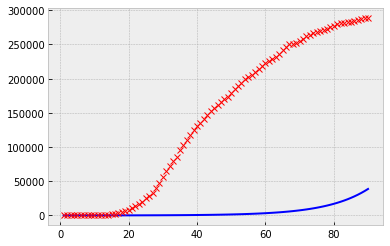

In [301]:
#plt.plot(xData, yData, 'x')

resultFunctions = integrate.odeint(SIR, (S0, I0, R0), xData, args=(beta, gamma))



acumulativeInfectiusReal = []
acumulativeInfectius = []
for i in range(0,len(yData)):
    if(i==0):
        acumulativeInfectiusReal.append(yData[0])
        acumulativeInfectius.append(resultFunctions[0,1])
    else:
        acumulativeInfectiusReal.append(acumulativeInfectiusReal[i-1]+yData[i])
        acumulativeInfectius.append(acumulativeInfectius[i-1]+resultFunctions[i,1])

plt.plot(xData,acumulativeInfectius,"b")
plt.plot(xData, acumulativeInfectiusReal,'rx')
plt.show()

### Plot

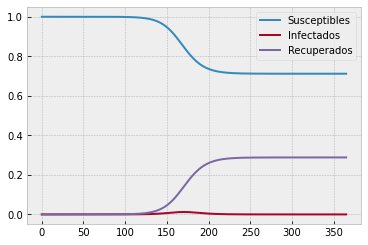

In [302]:
yearsFuture = 1

predict = np.linspace(0.0,365*yearsFuture,num=365*yearsFuture)
resultFunctions = integrate.odeint(SIR, (S0, I0, R0), predict, args=(beta, gamma))

plt.plot(predict, resultFunctions[:,0]/N)
plt.plot(predict, resultFunctions[:,1]/N)
plt.plot(predict, resultFunctions[:,2]/N)
plt.legend(["Susceptibles","Infectados","Recuperados"])
plt.show()

## Caso Hipotetico

### Valores iniciales


In [303]:
N=1000
I0 = 1
S0 = N-I0
R0 = 0
beta = 0.5
gamma = 0.167

smallModelX = np.linspace(0.0,60,60)
smallModelSIR = integrate.odeint(SIR, (S0, I0, R0), smallModelX, args=(beta, gamma))

### PLOTS

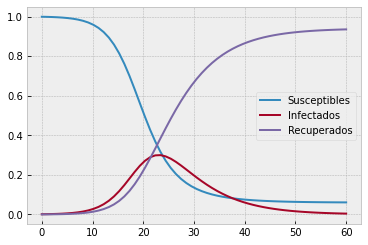

In [304]:
plt.plot(smallModelX, smallModelSIR[:,0]/N)
plt.plot(smallModelX, smallModelSIR[:,1]/N)
plt.plot(smallModelX, smallModelSIR[:,2]/N)
plt.legend(["Susceptibles","Infectados","Recuperados"])
plt.show()